In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import folium
from myfunction import *

## Import Data File

In [2]:
# Mining Data
mining_df = pd.read_csv('../Output/industry/mining.csv')
# Drilling Data
drill_df = pd.read_csv('../Output/industry/drilling.csv')
# Arrival Data
## Quarter
arrive_df = pd.read_csv('../Output/industry/arrival.csv')
## Monthly
arrive_m_df = pd.read_csv('../Output/industry/m_arrive.csv') 
# Departure Data
## Quarter
depart_df = pd.read_csv('../Output/industry/departure.csv')
## Monthly
depart_m_df = pd.read_csv('../Output/industry/m_depart.csv') 
# C19 Quarterly Data
c19_q = pd.read_csv('../Output/industry/Q_C19_AU_2018_2021.csv')
# C19 Monthly Data
c19_m = pd.read_csv('../Output/industry/M_C19_AU_2018_2021.csv')


# CoVID-19 Data
- Quarterly (mining and travel)
- Monthly (travel), and 
- for Choropleth (sum of total)

In [3]:
# convert quarterly data covid to suit mining and travel industries
# mining = 12 Q, travel = 13 Q


# Mining Data
# Select column so correspond to the metric data. ACT will be removed for mining 
c19_q_df = c19_q[['NSW', 'VIC', 'QLD', 'SA', 'WA', 'TAS', 'NT','AU', 'Quarter']]
c19_q_mining = c19_q_df.iloc[:12,:]

c19_q_mining = c19_q_mining.set_index('Quarter')
c19_q_mining

,NSW,VIC,QLD,SA,WA,TAS,NT,AU
Quarter,,,,,,,,
Q1_2018,0,0,0,0,0,0,0,0
Q2_2018,0,0,0,0,0,0,0,0
Q3_2018,0,0,0,0,0,0,0,0
Q4_2018,0,0,0,0,0,0,0,0
Q1_2019,0,0,0,0,0,0,0,0
Q2_2019,0,0,0,0,0,0,0,0
Q3_2019,0,0,0,0,0,0,0,0
Q4_2019,0,0,0,0,0,0,0,0
Q1_2020,2032,917,743,337,364,69,17,4559


In [4]:
# For Travel Data

# Re-arrange Data
c19_q_travel = c19_q[['NSW', 'VIC', 'QLD', 'SA', 'WA', 'TAS', 'NT','ACT','AU', 'Quarter']]
# Remove April 2021
c19_q_travel = c19_q_travel.iloc[:-1,:]
# Set index to Quarter
c19_q_travel = c19_q_travel.set_index('Quarter')
c19_q_travel.head()

,NSW,VIC,QLD,SA,WA,TAS,NT,ACT,AU
Quarter,,,,,,,,,
Q1_2018,0,0,0,0,0,0,0,0,0
Q2_2018,0,0,0,0,0,0,0,0,0
Q3_2018,0,0,0,0,0,0,0,0,0
Q4_2018,0,0,0,0,0,0,0,0,0
Q1_2019,0,0,0,0,0,0,0,0,0


In [5]:
# Monthly Data

# For Travel
# Re-arrange Data
c19_m_travel = c19_m[['NSW', 'VIC', 'QLD', 'SA', 'WA', 'TAS', 'NT','ACT','AU', 'Month']]
# Remove April 2021
c19_m_travel = c19_m_travel.iloc[:-1,:]
# Set index to Month
c19_m_travel = c19_m_travel.set_index('Month')
c19_m_travel.head()

,NSW,VIC,QLD,SA,WA,TAS,NT,ACT,AU
Month,,,,,,,,,
01_2018,0,0,0,0,0,0,0,0,0
02_2018,0,0,0,0,0,0,0,0,0
03_2018,0,0,0,0,0,0,0,0,0
04_2018,0,0,0,0,0,0,0,0,0
05_2018,0,0,0,0,0,0,0,0,0


In [6]:
# Data for Choropleth
c19_df = pd.DataFrame(c19_q[['NSW', 'VIC', 'QLD', 'SA', 'WA', 'TAS', 'NT','ACT']].sum())
c19_df = c19_df.reset_index()
# Create State ID for choropleth plot
c19_df['State ID'] = [i for i in range(8)] 
c19_df.columns = ['State', 'Cases', 'State ID']
c19_df.to_csv('../Output/industry/C19_AU.csv')
c19_df

,State,Cases,State ID
0,NSW,5402,0
1,VIC,20504,1
2,QLD,1520,2
3,SA,693,3
4,WA,982,4
5,TAS,234,5
6,NT,136,6
7,ACT,123,7


# Mining and Petroleum Data

Only quarter

In [7]:
mining = mining_df.iloc[:,1:10]
mining = mining.set_index('Quarter')
mining.head()

,NSW,VIC,QLD,SA,WA,TAS,NT,AU
Quarter,,,,,,,,
Q1_2018,61.0,18.4,56.8,14.1,261.0,4.7,22.5,438.5
Q2_2018,68.5,24.5,70.3,19.7,349.8,6.7,28.3,567.8
Q3_2018,56.7,22.4,86.1,20.4,361.0,5.3,32.5,584.4
Q4_2018,61.2,28.3,90.3,21.9,346.3,4.8,39.9,592.7
Q1_2019,61.8,24.4,51.7,16.5,319.5,3.7,27.0,504.6


In [8]:
drill = drill_df.iloc[:,1:10]
drill = drill.set_index('Quarter')
drill.head()

,Onshore,Offshore
Quarter,,
Q1_2018,76.6,106.7
Q2_2018,91.9,224.2
Q3_2018,99.7,208.2
Q4_2018,130.5,222.0
Q1_2019,94.1,128.4


# Travel Data

- Quarterly
- Monthly

In [9]:
arrive = arrive_df.iloc[:,1:]
arrive = arrive.set_index('Quarter')
arrive

,NSW,VIC,QLD,SA,WA,TAS,NT,ACT,AU
Quarter,,,,,,,,,
Q1_2018,2264540,1478110,1009060,139500,591850,9330,38810,13660,5545340
Q2_2018,1859650,1255830,892100,108610,500010,10,37590,11880,4665990
Q3_2018,2136460,1483730,1051700,139680,587500,0,42360,12170,5454430
Q4_2018,2219700,1497420,1001920,137420,576590,9670,40080,9890,5493170
Q1_2019,2286190,1582830,1017510,144390,585240,11710,37550,9320,5675200
Q2_2019,1930310,1343030,913030,121990,505380,3440,40430,9680,4867600
Q3_2019,2135730,1529090,1067850,161450,589630,0,51850,11390,5547530
Q4_2019,2197510,1532980,1043400,151130,604890,10270,49730,9490,5599880
Q1_2020,1843790,1306030,876930,131740,536100,15310,37340,6740,4754410


In [10]:
depart = depart_df.iloc[:,1:]
depart = depart.set_index('Quarter')
depart

,NSW,VIC,QLD,SA,WA,TAS,NT,ACT,AU
Quarter,,,,,,,,,
Q1_2018,2098000,1353340,936870,123940,530020,360,34650,11080,5088610
Q2_2018,2040910,1357580,935430,127300,561660,20,35120,14410,5072860
Q3_2018,2059470,1417340,1037680,132730,559120,0,39910,13800,5260660
Q4_2018,2248380,1507740,1030620,137040,578090,1560,40710,12500,5557430
Q1_2019,2091860,1408310,931200,127370,527530,500,34270,9760,5131120
Q2_2019,2093130,1461570,970010,138910,554810,50,43150,13560,5275500
Q3_2019,2076440,1460650,1057180,152920,569910,10,46180,13130,5376910
Q4_2019,2250200,1550810,1062600,151250,610700,1840,43190,12020,5683360
Q1_2020,1654330,1121530,758430,105580,453350,720,27470,6670,4128350


# Travel Data

## - Monthly Data

In [11]:
arrive_m = arrive_m_df[['NSW', 'VIC', 'QLD', 'SA', 'WA', 'TAS', 'NT','ACT','AU', 'Month']]
arrive_m = arrive_m.set_index('Month')
arrive_m.head()

,NSW,VIC,QLD,SA,WA,TAS,NT,ACT,AU
Month,,,,,,,,,
1_2018,863050,556050,385950,59170,238110,4180,17670,5520,2129950
2_2018,712280,472760,305220,41800,178580,4950,11180,3900,1730770
3_2018,689210,449300,317890,38530,175160,200,9960,4240,1684620
4_2018,668550,454770,317150,36650,174350,10,13090,5180,1669910
5_2018,602770,387800,281320,35660,160380,0,10310,3100,1481410


In [12]:
depart_m = depart_m_df[['NSW', 'VIC', 'QLD', 'SA', 'WA', 'TAS', 'NT','ACT','AU', 'Month']]
depart_m = depart_m.set_index('Month')
depart_m.head()

,NSW,VIC,QLD,SA,WA,TAS,NT,ACT,AU
Month,,,,,,,,,
1_2018,748190,479140,327980,48530,195640,150,12380,3960,1816080
2_2018,638900,404040,280840,33510,151280,180,10450,3280,1522590
3_2018,710910,470160,328050,41900,183100,30,11820,3840,1749940
4_2018,714140,441970,316060,42450,189050,10,11750,4920,1720520
5_2018,620480,418940,296250,40250,171110,10,10150,4390,1561640


 # Data for Choropleth

 - Covid Data

In [13]:
# Arrival Choropleth

sum_arrive=pd.DataFrame(arrive_m.sum())
sum_arrive.reset_index(inplace = True)
state_id = [i for i in range(9)]
sum_arrive['State ID'] = state_id
sum_arrive.columns = ['State', 'Arrival', 'State ID']
cho_arrive = sum_arrive.iloc[:8,:]
cho_arrive

,State,Arrival,State ID
0,NSW,19017830,0
1,VIC,13046800,1
2,QLD,8925940,2
3,SA,1250500,3
4,WA,5111710,4
5,TAS,60220,5
6,NT,388280,6
7,ACT,95220,7


In [14]:
total_c19 = pd.DataFrame(c19_q_travel.sum())
total_c19

,0
NSW,5296
VIC,20484
QLD,1477
SA,656
WA,944
TAS,234
NT,108
ACT,123
AU,29322


# Plot the data against COVID 19 Data

In [15]:
# def mysubplot(x1_data,y1_data, y2_data, xlabel, y1_label, y2_label, xticklabel, xlim, fname):
#     '''
#     mysubplot is to plot 2 graphs with the same x-axis, in 2 y-axis.
#     prefix - 1 is for the first data
#     prefix - 2 is for the 2nd data
#     xticklabel - is for labelling the x-axis
#     xlim - is limitation for x-axis, for the following:
#         11 - mining and petroleum
#         12 - arrival and departure
#     '''
#     fig,ax = plt.subplots()
#     # make a plot
#     ax.plot(x1_data, y1_data, color="red", marker="o")
#     # set x-axis label
#     ax.set_xlabel("Year",fontsize=14)
#     # set y-axis label
#     ax.set_ylabel(y1_label,color="red",fontsize=14)

#     # twin object for two different y-axis on the sample plot
#     ax2=ax.twinx()
#     # make a plot with different y-axis using second axis object
#     ax2.plot(x1_data, y2_data,color="blue",marker="o")
#     ax2.set_ylabel(y2_label,color="blue",fontsize=14)
#     # ax.set_xticks(mining.index)
#     ax.set_xticklabels(labels = xticklabel, rotation = 90)
#     ax.grid(which='major')
#     ax.set_xlim(0,xlim)
#     plt.show()
#     # save the plot as a file
#     fig.savefig(f'../Output/industry/{fname}.png',
#                 format='png',
#                 dpi=100,
#                 bbox_inches='tight')

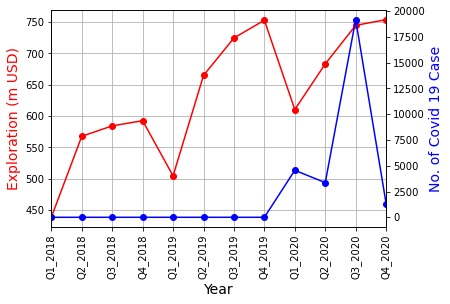

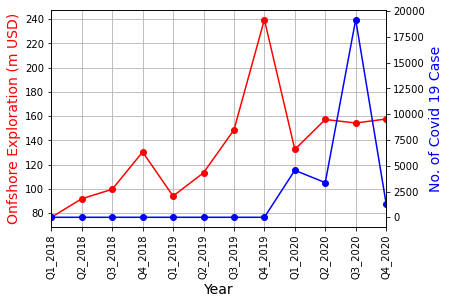

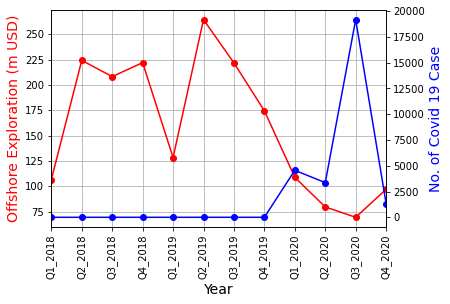

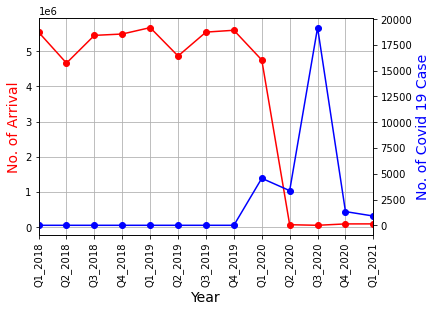

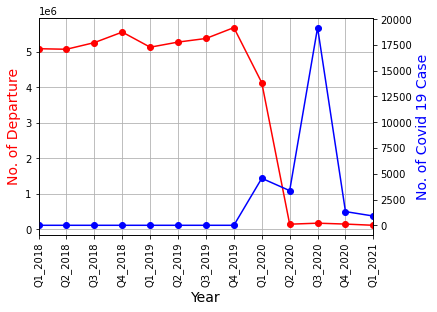

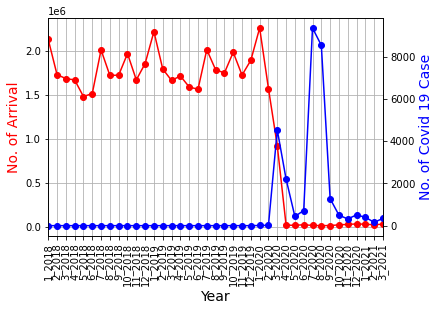

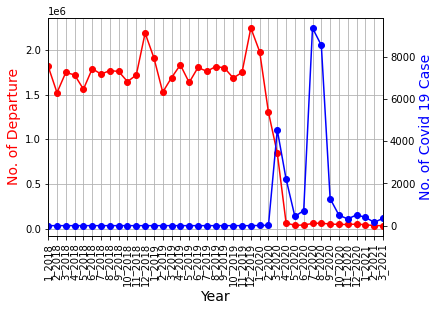

In [16]:
# Metric data
x1_data = [mining.index, drill.index,drill.index, arrive.index, depart.index, arrive_m.index, arrive_m.index]
y1_data = [mining.AU, drill.Onshore, drill.Offshore, arrive.AU, depart.AU,arrive_m.AU, depart_m.AU]
y2_data = [c19_q_mining.AU, c19_q_mining.AU, c19_q_mining.AU, c19_q_travel.AU, c19_q_travel.AU, c19_m_travel.AU, c19_m_travel.AU]
xlabel = 'Year'
y1_label = ['Exploration (m USD)', 'Onfshore Exploration (m USD)', 'Offshore Exploration (m USD)','No. of Arrival', 'No. of Departure', 'No. of Arrival', 'No. of Departure']
y2_label = 'No. of Covid 19 Case'
fname = ['mining', 'on_drilling', 'off_drilling','arrival', 'departure', 'arrival_m', 'depart_m']
xticklabel = [mining.index, mining.index, mining.index, arrive.index, arrive.index,arrive_m.index,arrive_m.index]
xlim = [11,11,11,12,12, 38, 38]

for i in range(len(x1_data)):
    mysubplot(x1_data[i], y1_data[i], y2_data[i], xlabel, y1_label[i], y2_label, xticklabel[i], xlim[i], fname[i])

In [17]:
# xdata = [c19_q_mining.AU, c19_q_mining.AU, c19_m_travel.AU, c19_m_travel.AU] 
# ydata = [mining.AU, drill.Onshore, arrive_m.AU, depart_m.AU] 
# xpos = [max(c19_q_mining.AU)/4, max(c19_q_mining.AU)/4, 
# max(c19_m_travel.AU)/4, max(c19_m_travel.AU)/4]
# ypos = [max(mining.AU)/4, max(drill.Onshore)/4, max(arrive_m.AU)/4, max(depart_m.AU)/4]
# title = ['Correlation between CoVID and Mining Exploration',
# 'Correlation between CoVID and Onshore Exploration Drilling Petroleum',
# 'Correlation between CoVID and No. of Arrival',
# 'Correlation between CoVID and No. of Departure'
# ]
# xlabel = 'No. of C19 Cases'
# ylabel = ['Mining Exploration (m USD)',
# 'Onshore Exploration Drilling Petroleum  (m USD)',
# 'No. of Arrival',
# 'No. of Departure'
# ]
# fname = ['corr_mining, corr_drill, corr_arrival, corr_depart']
# for i in range(len(xdata)):
#     myreg(xdata[i],ydata[i],xpos[i],ypos[i], title[i], xlabel,ylabel[i],fname[i])

In [18]:
# xdata = [c19_q_mining.AU, c19_q_mining.AU, c19_q_mining.AU, c19_m_travel.AU]#, c19_m_travel.AU] 
# ydata = [mining.AU, drill.Onshore, drill.Offshore, arrive_m.AU]#, depart_m.AU] 
# xpos = [(max(c19_q_mining.AU)/2), (max(c19_q_mining.AU)/2), (max(c19_q_mining.AU)/2),(max(c19_m_travel.AU)/4)]#, max(c19_m_travel.AU)/4]
# ypos = [(max(mining.AU)/2), (max(drill.Onshore)/2), (max(drill.Offshore)/2), 
# (max(arrive_m.AU)/4)]#, max(depart_m.AU)/4]
# title = ['Correlation between CoVID and Mining Exploration',
# 'Correlation between CoVID and Onshore Exploration Drilling Petroleum',
# 'Correlation between CoVID and Offshore Exploration Drilling Petroleum',
# 'Correlation between CoVID and No. of Arrival']#,
# # 'Correlation between CoVID and No. of Departure'
# # ]
# xlabel = 'No. of C19 Cases'
# ylabel = ['Mining Exploration (m USD)',
# 'Onshore Exploration Drilling Petroleum  (m USD)',
# 'Offshore Exploration Drilling Petroleum  (m USD)',
# 'No. of Arrival']#,
# # 'No. of Departure'
# # ]
# fname = ['corr_mining', 'corr_on_drill', 'corr_off_drill', 'corr_arrival']
# for i in range(len(xdata)):
#     # print(i,xdata[i])
#     myreg(xdata[i],ydata[i],xpos[i],ypos[i], title[i], xlabel,ylabel[i],fname[i])

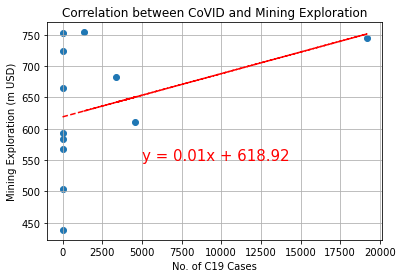

The r-squared is: 0.1366584506813778
The p-value is: 0.23692581212637265
p-val > 0.05, there is not enough evidance to reject null hypothesis


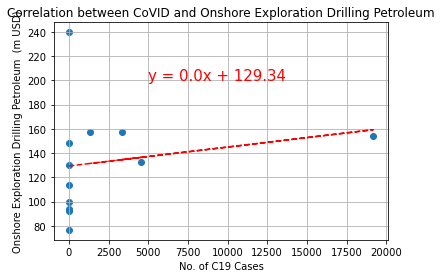

The r-squared is: 0.03847639722998796
The p-value is: 0.5411998367016548
p-val > 0.05, there is not enough evidance to reject null hypothesis


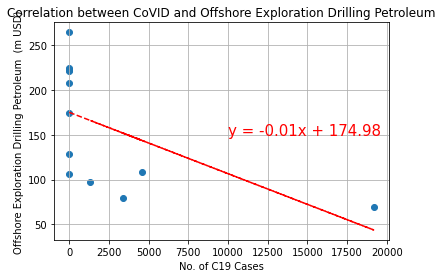

The r-squared is: 0.31154073651222375
The p-value is: 0.05929541487734095
p-val > 0.05, there is not enough evidance to reject null hypothesis


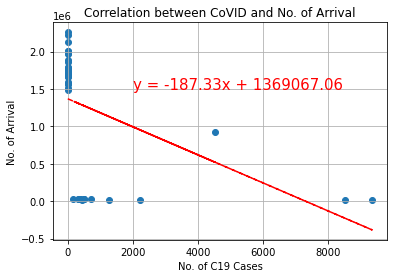

The r-squared is: 0.2178471775578786
The p-value is: 0.002742097428685961
p-val < 0.05, hence null hypothesis is rejected


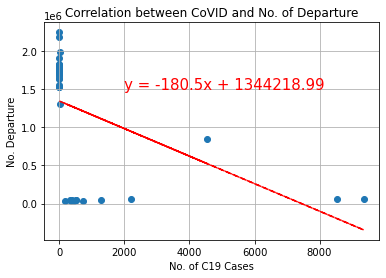

The r-squared is: 0.21673703697427443
The p-value is: 0.002820972725695021
p-val < 0.05, hence null hypothesis is rejected


In [19]:
xdata = [c19_q_mining.AU, c19_q_mining.AU, c19_q_mining.AU, c19_m_travel.AU, c19_m_travel.AU]
ydata = [mining.AU, drill.Onshore, drill.Offshore, arrive_m.AU, depart_m.AU] 
xpos = [5000, 5000, 10000, 2000, 2000]
ypos = [550, 200, 150, 1500000, 1500000]
title = ['Correlation between CoVID and Mining Exploration', 'Correlation between CoVID and Onshore Exploration Drilling Petroleum',
'Correlation between CoVID and Offshore Exploration Drilling Petroleum',
'Correlation between CoVID and No. of Arrival',
'Correlation between CoVID and No. of Departure']
xlabel = 'No. of C19 Cases'
ylabel = ['Mining Exploration (m USD)','Onshore Exploration Drilling Petroleum  (m USD)', 'Offshore Exploration Drilling Petroleum  (m USD)',
'No. of Arrival', 'No. Departure']

fname = ['corr_mining', 'corr_on_drill', 'corr_off_drill', 'corr_arrive', 'corr_depart']
for i in range(len(xdata)):
    # print(i,xdata[i])
    myreg(xdata[i],ydata[i],xpos[i],ypos[i], title[i], xlabel,ylabel[i],fname[i])

In [20]:
depart_m.head()

,NSW,VIC,QLD,SA,WA,TAS,NT,ACT,AU
Month,,,,,,,,,
1_2018,748190,479140,327980,48530,195640,150,12380,3960,1816080
2_2018,638900,404040,280840,33510,151280,180,10450,3280,1522590
3_2018,710910,470160,328050,41900,183100,30,11820,3840,1749940
4_2018,714140,441970,316060,42450,189050,10,11750,4920,1720520
5_2018,620480,418940,296250,40250,171110,10,10150,4390,1561640


In [21]:
arrive_m.head()

,NSW,VIC,QLD,SA,WA,TAS,NT,ACT,AU
Month,,,,,,,,,
1_2018,863050,556050,385950,59170,238110,4180,17670,5520,2129950
2_2018,712280,472760,305220,41800,178580,4950,11180,3900,1730770
3_2018,689210,449300,317890,38530,175160,200,9960,4240,1684620
4_2018,668550,454770,317150,36650,174350,10,13090,5180,1669910
5_2018,602770,387800,281320,35660,160380,0,10310,3100,1481410


In [22]:
m = folium.Map(location=[-28.314629039038312, 139.577597363054], zoom_start=4)

In [23]:
url = (
    "https://raw.githubusercontent.com/rowanhogan/australian-states/master/states.min.geojson"
)
state_geo = f"{url}"

# c19_df
# state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"
# state_data = pd.read_csv(state_unemployment)

In [24]:
folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=c19_df,
    columns=["State ID", "Cases"],
    key_on="feature.id",
    fill_color="PuBuGn",
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="No. Of Cases",
).add_to(m)


folium.LayerControl().add_to(m)
m

In [25]:
arrivalmap = folium.Map(location=[-28.314629039038312, 139.577597363054], zoom_start=4)
# arrivalmap

In [26]:
folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=cho_arrive,
    columns=["State ID", "Arrival"],
    key_on="feature.id",
    fill_color="PuBuGn",
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="No. Of Arrival",
).add_to(arrivalmap)


folium.LayerControl().add_to(arrivalmap)
arrivalmap.save('../Output/industry/arrivalmap.html')
arrivalmap